In [28]:
# Import Libraries: 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [29]:
# Import data
df = pd.read_csv('kyphosis.csv')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [31]:
df.columns

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

In [32]:
# minimum age
df['Age'].min()

1

In [33]:
#maximum age 
df['Age'].max()

206

In [34]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [35]:
# replace absent with 0 and present with 1
df['Kyphosis'] = df['Kyphosis'].replace({'absent': 0, 'present': 1})
df.head(4)

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1


In [36]:
col_list = df.columns.tolist()[1:]
col_list

['Age', 'Number', 'Start']

In [37]:
df_new = df[col_list]

In [38]:
# we can change the absent and 
Kyphosis_True = df[df['Kyphosis']==1]
Kyphosis_False = df[df['Kyphosis']==0]

<Axes: >

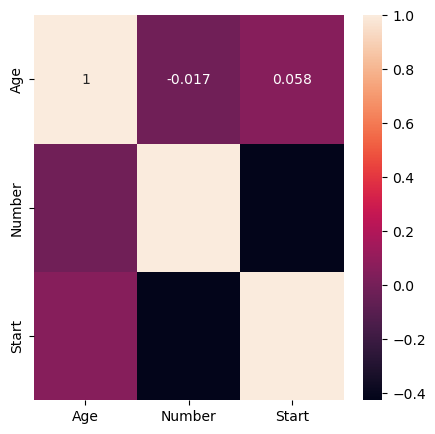

In [39]:
# let us see the correlation between two variables

plt.figure(figsize=(5,5)) 
sns.heatmap(df_new.corr(),annot = True)

/Users/kritikakhanwal/miniconda3/envs/nemo/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kritikakhanwal/miniconda3/envs/nemo/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kritikakhanwal/miniconda3/envs/nemo/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


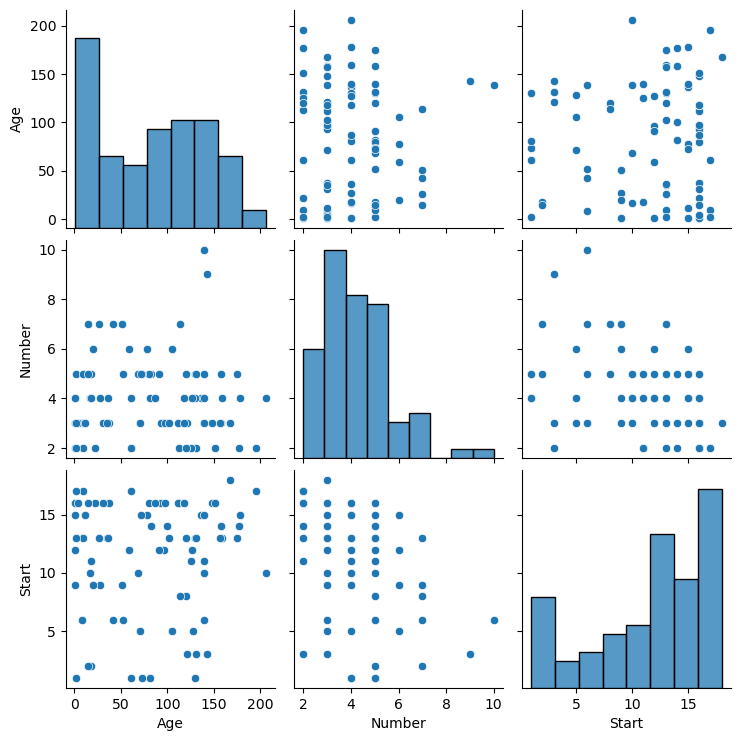

In [40]:
# we can check the pairwise plot between all the x features to see their dependencies: 
sns.pairplot(df_new)

<Axes: xlabel='Kyphosis', ylabel='count'>

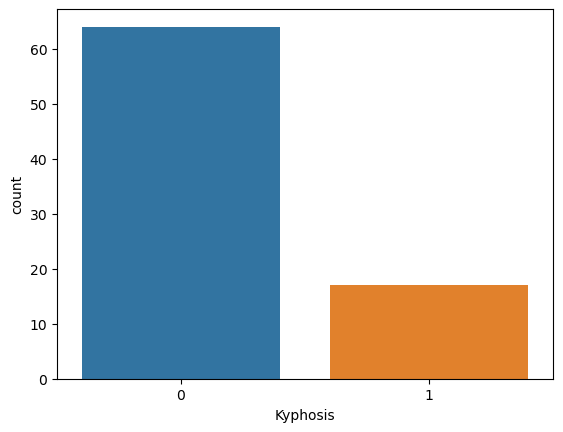

In [41]:
# 0 denotes absent and y denotes present
sns.countplot(df,x = 'Kyphosis')

In [42]:
# Lets not get the X and Y variables that we will use to train and test:
X = df.drop(['Kyphosis'],axis = 1)
Y = df.Kyphosis

In [43]:
# divide the data into test and train samples:

X_train,X_test ,Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

In [44]:
X_train.shape
X_test.shape

(17, 3)

In [45]:
# transform the train and test data using StandardScaler which will normalise the training and test data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train,Y_train)

LogisticRegression()

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
# Predicting the Test set results
Y_predict_test = model.predict(X_test)
cm = confusion_matrix(Y_test,Y_predict_test)

<Axes: >

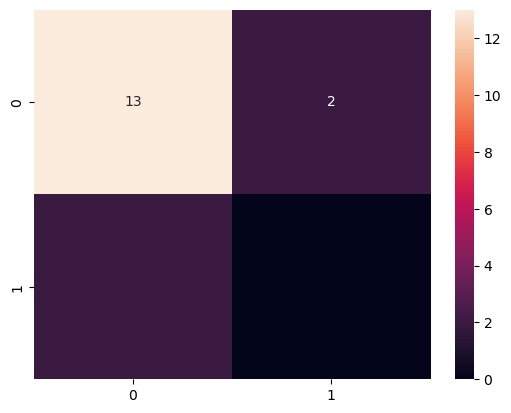

In [25]:
sns.heatmap(cm, annot = True)

atleast for 13 data the prediction was correctly done. 

In [27]:
print(classification_report(Y_test,Y_predict_test))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.00      0.00      0.00         2

    accuracy                           0.76        17
   macro avg       0.43      0.43      0.43        17
weighted avg       0.76      0.76      0.76        17

